<a href="https://colab.research.google.com/github/Guyinbarr/DSP/blob/main/Transmition_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This DSP exercise is from DSP course provided by École Polytechnique Fédérale de Lausanne

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile

In [8]:
plt.rcParams["figure.figsize"] = [14, 4]

In [5]:
from google.colab import files
uploaded = files.upload()

Saving superman.wav to superman.wav


In [70]:
def SNR(signal, noisy):
  #the power of a discrete signal is proportional to the square of its norm
  error = np.linalg.norm(signal - noisy)
  sig = np.linalg.norm(signal )
  return 10 * np.log10(sig / error)

def AnalogTransmition(num_of_loops, signal, noise_amp, attenuation):
  for i in range (0,num_of_loops):
    signal = signal * attenuation # 1/G attenuation
    noise = np.random.uniform(-noise_amp, noise_amp, signal.shape)
    signal = (signal + noise) / attenuation # (signal + noise ) * G
  return signal

def DigitalTransmition(num_of_loops, signal, noise_amp, attenuation):
    for i in range (0,num_of_loops):
      signal = signal * attenuation # 1/G attenuation
      noise = np.random.uniform(-noise_amp, noise_amp, signal.shape)
      signal = np.round((signal + noise) / attenuation) # (signal + noise ) * G
    return signal




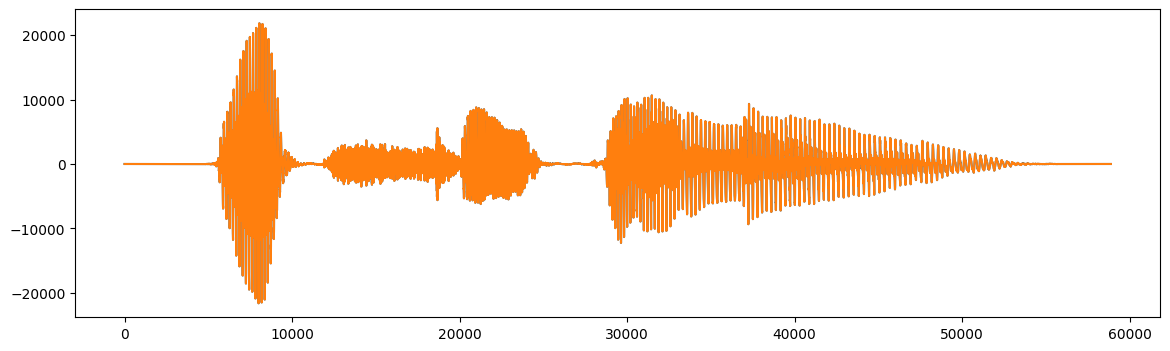

In [13]:
sample_rate, sample = wavfile.read('superman.wav')
plt.plot(sample)
IPython.display.Audio('superman.wav')

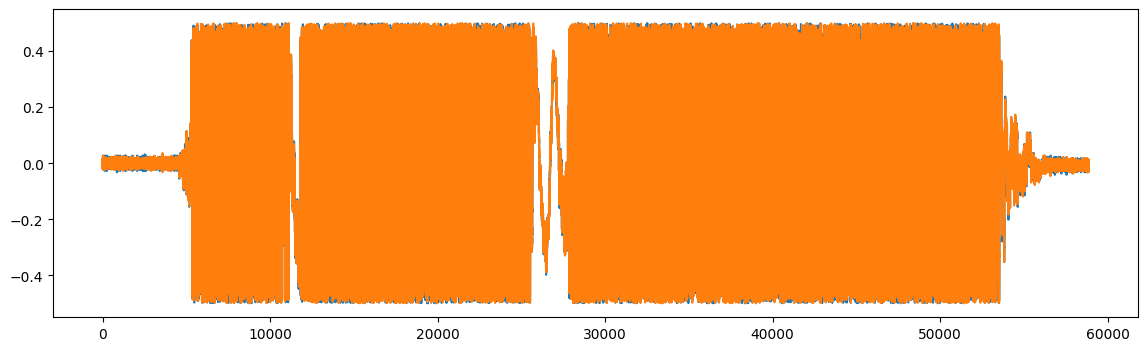

In [22]:
# In order to simulate an analog signal i will use a floating point for numeric accuracy
# for the digital signal we will round up to integers.
# also we will normalize the valuese to be between -100 and 100.

norm = 1.0 / max(np.abs([np.min(sample), np.max(sample)])) # finding the max value
analog_sample = sample * norm * 100
digital_sample = np.round(analog_sample)

quantization_error = analog_sample - digital_sample
plt.plot(quantization_error)

In [46]:
snr_value = SNR(analog_sample, digital_sample)
print('SNR = %f dB' % snr_value)

SNR = 17.486143 dB


In [76]:
# considering a Transatlantic transmition line from EU to the US.
# approx. 7000km and 100km spacing between repeaters

num_of_loops = 70
noise_amp = 0.2
attenuation = 0.5

trans_analog = AnalogTransmition(num_of_loops, analog_sample, noise_amp, attenuation)
analog_snr = SNR(analog_sample, trans_analog)
print('SNR = %f dB' % analog_snr)

trans_digital = DigitalTransmition(num_of_loops, digital_sample, noise_amp, attenuation)
digital_snr = SNR(analog_sample, trans_digital)
print('SNR = %f dB' % digital_snr)

SNR = 8.775115 dB
SNR = 17.486143 dB


In [88]:
analog_mono = np.mean(trans_analog, axis=1)
IPython.display.Audio(analog_mono, rate=sample_rate)

In [89]:
digital_mono = np.mean(trans_digital, axis=1)
IPython.display.Audio(digital_mono, rate=sample_rate)